# Traitement de données LiDAR

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10, 10

%matplotlib inline

In [2]:
import os
os.chdir("..")

In [3]:
os.getcwd()

'C:\\Users\\Clément\\PycharmProjects\\lidar-processor'

In [4]:
from src.main.constants import *
import src.main.main_script as mm
import src.main.clustering as clus
import src.main.output_rendering as outr
from src.retrieve_realistic_measures import get_realistic_data
import src.check_hough as chh
import src.check_clustering as chc

In [5]:
os.getcwd()

'C:\\Users\\Clément\\PycharmProjects\\lidar-processor'

In [6]:
several_measures = get_realistic_data()

C:\Users\Clément\PycharmProjects\lidar-processor


In [7]:
one_turn_measure = several_measures[0]


949


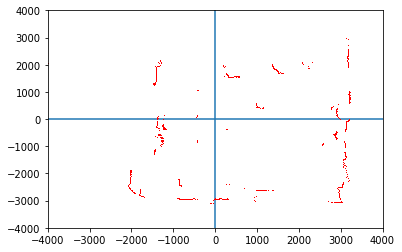

In [8]:
one_turn_measure = outr.keep_good_measures(one_turn_measure, 30)
print(len(one_turn_measure))
chh.display_measures(one_turn_measure)

704


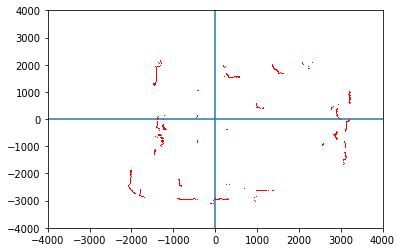

In [9]:
one_turn_measure = mm.remove_too_far_or_too_close(one_turn_measure)
print(len(one_turn_measure))
chh.display_measures(one_turn_measure)

In [10]:
cartesian_one_turn_measure = outr.one_turn_to_cartesian_points(one_turn_measure)
cartesian_one_turn_measure = [np.array(measure) for measure in cartesian_one_turn_measure]
clusters, means = clus.clusterize(cartesian_one_turn_measure)

-----------Measures display-----------
73
30
30
5
43
52
2
72
17
49
63
66
12
16
34
32
1
20
5
22
7
16
21


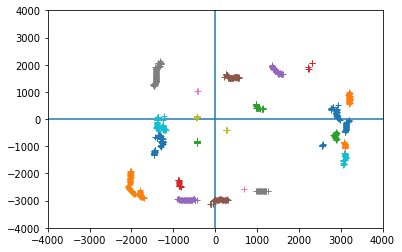

In [11]:
chc.plot_clustering(clusters)

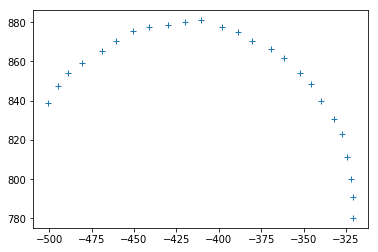

In [12]:
thetas = np.deg2rad(np.arange(0, 150, 6))
real_x, real_y = (-420, 780)
real_radius = 100
# xx = real_radius * np.cos(thetas) + real_x
xx = real_radius * np.cos(thetas) + real_x + np.random.randn(len(thetas))
# yy = real_radius * np.sin(thetas) + real_y
yy = real_radius * np.sin(thetas) + real_y + np.random.randn(len(thetas))

pl.plot(xx, yy, '+')
pl.show()

In [13]:
sigma = 1
points = [np.array([xx[i], yy[i]])+np.random.randn(2)*sigma for i in range(len(xx))]
cluster = clus.Cluster()
cluster.add_points(points)
cluster.is_a_circle(100)

solution [-420.04751286  779.94380775]
error [53.36357174  0.        ]


   cov_x: array([[-2.43515075e+21,  1.18059162e+21],
       [ 1.18059162e+21, -5.72365622e+20]])
    fjac: array([[ 3.04839344e-03,  8.89756660e-08],
       [ 1.47789937e-03, -0.00000000e+00]])
     fun: array([53.36357174,  0.        ])
    ipvt: array([2, 1], dtype=int32)
 message: 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000'
    nfev: 52
     qtf: array([-53.36357192,   0.        ])
  status: 1
 success: True
       x: array([-420.04751286,  779.94380775])